# Project_06 - Hypothesis_Testing (Games)

**Project Goals:**
<br>-Import the games.csv dataset, clean, preprocess, perform an EDA, and finally visualize and uncover insights from the dataset.
<br>-Bring insights to how different titles, platforms, and genres perform in differenct regions.
<br>-Give insights to how different game platforms have emerged and disappeared over the years.
<br>-How the preferences for platforms and genres differ in regions (US, EU, JP)
<br>-Test if there are any correlations between ratings, review scores (user & critic) and game sales.
<br>-Perform hypothesis test on if the different plastforms and genres have statistically significant sales difference.

**Instructions for completing the project**
<br>**Step 1. Open the data file and study the general information**
<br>**File path**: /datasets/games.csv

**Step 2. Prepare the data**
<br>Replace the column names (make them lowercase).
<br>Convert the data to the required types.
<br>Describe the columns where the data types have been changed and why.
<br>If necessary, decide how to deal with missing values:
<br>Explain why you filled in the missing values as you did or why you decided to leave them blank.
<br>Why do you think the values are missing? Give possible reasons.
<br>Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
<br>Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

**Step 3. Analyze the data**
<br>Look at how many games were released in different years. Is the data for every period significant?
<br>Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
<br>Find platforms that used to be popular but now have zero sales. 
<br>How long does it generally take for new platforms to appear and old ones to fade?
<br>Determine what period to take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
<br>Work only with the data that you've decided is relevant. Disregard the data for previous years.
<br>Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
<br>Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
<br>Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
<br>Keeping your conclusions in mind, compare the sales of the same games on other platforms.
<br>Look at the general distribution of games by genre. What can we say about the most profitable genres? Generalize about genres with high and low sales.

**Step 4. Create a user profile for each region**
<br>For each region (NA, EU, JP), determine:
<br>The top five platforms. Describe variations in their market shares from region to region.
<br>The top five genres. Explain the difference.
<br>Do ESRB ratings affect sales in individual regions?

**Step 5. Test the following hypotheses:**
<br>—Average user ratings of the Xbox One and PC platforms are the same.
<br>—Average user ratings for the Action and Sports genres are different.
<br>Set the alpha threshold value yourself.
<br>**Explain:**
<br>—How you formulated the null and alternative hypotheses
<br>—What significance level you chose to test the hypotheses, and why

**Step 6. Write a general conclusion**
Format: Complete the task in the Jupyter Notebook. Insert the programming code in the code cells and text explanations in the markdown cells. Apply formatting and add headings.

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [2]:
# imported the dataset
# 'comb_sales': Created a new column that is the sum of sales from all regions
game_df = pd.read_csv('datasets/project_12_dataset_games.csv')

In [4]:
# game_df.to_csv('~/work/project_datasets/project_12_dataset.csv', index=False, header=list(game_df.columns))

In [3]:
#game_df['comb_sales'] = game_df['NA_sales'] +  game_df['EU_sales'] + game_df['JP_sales'] + game_df['Other_sales']
game_df['comb_sales'] = game_df[[f"{i}_sales" for i in ('NA','EU','JP','Other')]].sum(axis=1)
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
 11  comb_sales       16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [4]:
# Replace the column names (make them lowercase)
game_df.columns = game_df.columns.str.lower()
display(game_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'comb_sales'],
      dtype='object')

**Q. Why do you think the values are missing? Give possible reasons.**
<br>Look at how many games were released in different years. Is the data for every period significant?

In [46]:
ngames = game_df[['year_of_release']].value_counts().reset_index()    # number of games
uscore_na = game_df[game_df['user_score'].isna()][['year_of_release']].value_counts().reset_index()    # number of missing user_score
cscore_na = game_df[game_df['critic_score'].isna()][['year_of_release']].value_counts().reset_index()   # number of missing critic_score

df3 = ngames.merge(uscore_na, on='year_of_release', how='left').merge(cscore_na, on='year_of_release', how='left')
df3.columns = ['year_of_release', 'ngames', 'uscore_na', 'cscore_na']
df3['uscore_na%'] = df3['uscore_na'] / df3['ngames']   # % of missing user_score
df3['cscore_na%'] = df3['cscore_na'] / df3['ngames']   # % of missing critic_score
display(df3.sort_values('year_of_release').head())

,year_of_release,ngames,uscore_na,cscore_na,uscore_na%,cscore_na%
36,1980.0,9,9,9,1.0,1.0
24,1981.0,46,46,46,1.0,1.0
27,1982.0,36,36,36,1.0,1.0
30,1983.0,17,17,17,1.0,1.0
35,1984.0,14,14,14,1.0,1.0


Up until 1999, less than 10% (0% for a lot of the early years) of the games had a user_score or critic_score.
<br>Then starting from ~2000, % of games with user_score or critic_score increased drastically, which coincides with the wide spread adoption of the internet.
<br>Then starting from ~2005, this % went started to decline due to the large number of games released each year.
<br>The number of games released before 1994 was less than 100, so I think these data are less significant. 

**Q. If necessary, decide how to deal with missing values:**
<br>Explain why you filled in the missing values as you did or why you decided to leave them blank.

In [47]:
# REVIEWER CODE
numbers = game_df[game_df.year_of_release.isna()].name.str.split()\
            .apply(lambda x: [int(s) for s in x if s.isdigit() and int(s) > 1950])
numbers = numbers[numbers.apply(len).astype(bool)].apply(lambda x:x[0])
#display(game_df.loc[numbers.index,:"year_of_release"].assign(year_of_release = numbers))
#del numbers

In [48]:
# 'year_of_release': As suggested, when there was a release year in the game name, missing values in this column were filled with this value.

year = game_df[game_df.year_of_release.isna()].name.str.split()\
        .apply(lambda x: [int(y) for y in x if y.isdigit() and int(y) > 1950])
year = year[year.apply(len)!=0].apply(lambda x: x[0])
game_df.loc[year.index, :'year_of_release'] = game_df.loc[year.index, :'year_of_release'].assign(year_of_release = year)

In [49]:
# Eliminated two entries without a game Name or genre.
# 'year_of_release': For the rest of the missing values, they were filled with each platform's median year_of_release values.
# 'year_of_release': Converted the datatype from float to int as this makes more sense.
# Sorted the dataframe by ascending order and resetted its index for later platform trend analysis.

game_df.dropna(subset=['name'], inplace=True)
game_df['year_of_release'] = game_df['year_of_release'].fillna(game_df.groupby('platform')['year_of_release'].transform('median'))
game_df['year_of_release'] = game_df['year_of_release'].astype(int)
game_df = game_df.sort_values(by='year_of_release')
game_df = game_df.reset_index(drop=True)

In [50]:
# 'user_score': Filling in missing values was a preventive measure since I was already replacing the 'tbd' values with 0. 
# 'user_score': Replaced all the 'tbd' in with int '0'. Converted the datatype to float as it's a number.
# 'critic_score': Same as the 'user_score' above, filling in missing values was a preventive measure.
# 'critic_score': All game scores varied greatly, so I couldn't fill with any other values like mean, median, or mode.
# 'rating': Filled in missing values with string 'N/A'.

mask = game_df['user_score'] == 'tbd'
game_df.loc[mask, 'user_score'] = game_df[mask]['user_score'].replace({'tbd':0})
game_df['user_score'] = game_df['user_score'].astype(float)
game_df['rating'] = game_df['rating'].fillna('N/A')

game_df.iloc[148, 1] = 'NES'
# This was an erroneous data point that I found later in the analysis.
# The DS console wasn't released until 2004, but this game released in 1985 had DS as its platform.

game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16713 non-null  object 
 11  comb_sales       16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [51]:
display(len(game_df['name'].unique()))
display(np.sort(game_df['platform'].unique()))
display(np.sort(game_df['year_of_release'].unique()))
display(game_df['genre'].unique())
display(game_df['rating'].unique())
#display(game_df['user_score'].unique())
#display(game_df['critic_score'].unique())

11559

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

array(['Shooter', 'Fighting', 'Misc', 'Action', 'Sports', 'Puzzle',
       'Platform', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

array(['N/A', 'T', 'E10+', 'M', 'K-A', 'E', 'AO', 'EC', 'RP'],
      dtype=object)

As mentioned above (df3), number of games released before 1994 was less than 100, so I think these data points are less significant. 

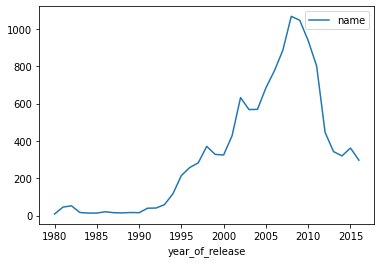

In [57]:
# REVIEWER CODE
pd.pivot_table(data=game_df,index='year_of_release', values="name",aggfunc='nunique').plot();

**Q. Choose the platforms with the greatest total sales and build a distribution based on data for each year.**

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
Name: comb_sales, dtype: float64

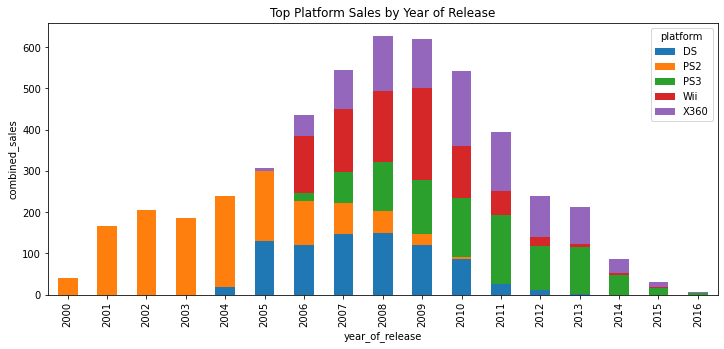

In [10]:
display(game_df.groupby('platform')['comb_sales'].sum().sort_values(ascending=False)[:5])
top_platform_list = list(game_df.groupby('platform')['comb_sales'].sum().sort_values(ascending=False)[:5].index)
top_platform_df = game_df[game_df['platform'].isin(top_platform_list)]
top_platform_pt = pd.pivot_table(top_platform_df, index='year_of_release', columns='platform', values='comb_sales', aggfunc='sum')
top_platform_pt.plot(kind='bar', stacked=True, title='Top Platform Sales by Year of Release', figsize=[12, 5])
plt.ylabel('combined_sales')
plt.show()

The top 5 platforms with the greatest sales in all regions are PS2, X360, PS3, Wii, and DS.

**Q. Find platforms that used to be popular but now have zero sales.**

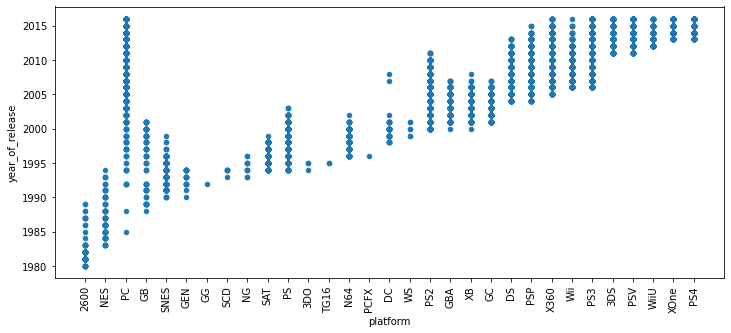

In [11]:
game_df.plot(kind='scatter', x='platform', y='year_of_release', figsize=[12, 5])
plt.xticks(rotation=90)
plt.show()

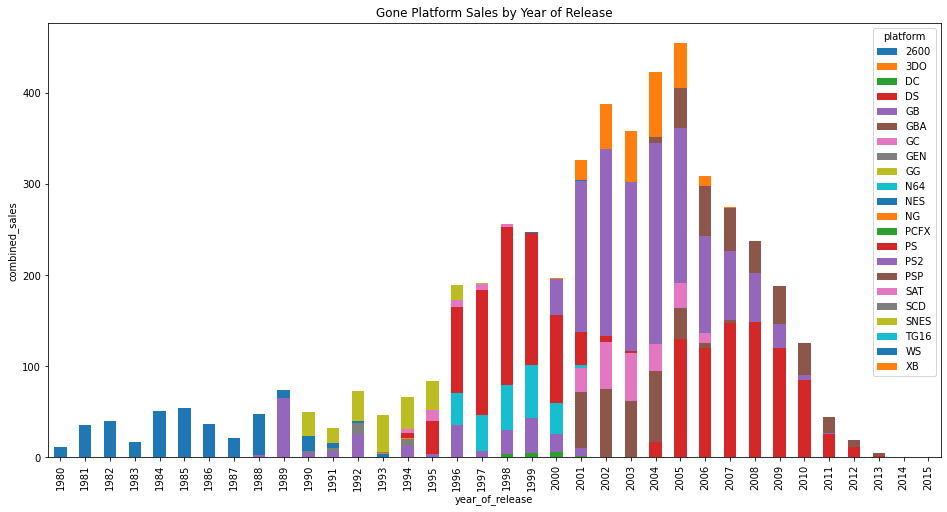

In [12]:
platform_list = set(game_df['platform'])
platform_list_2016 = set(game_df[game_df['year_of_release']== 2016]['platform'])
gone_platform_list = list(platform_list - platform_list_2016)

gone_platform_df = game_df[game_df['platform'].isin(gone_platform_list)]
gone_platform_pt = pd.pivot_table(gone_platform_df, index='year_of_release', columns='platform', values='comb_sales', aggfunc='sum')
gone_platform_pt.plot(kind='bar', stacked=True, title='Gone Platform Sales by Year of Release', figsize=[16, 8])
plt.ylabel('combined_sales')
plt.show()

A large number of game platforms that used to be popular now have zero sales.
<br>They are 'DC', 'PSP', 'NES', 'TG16', 'GC', 'N64', 'GB', 'DS', 'PS2', 'SAT', 'GBA', '2600', 'GEN', '3DO', 'PCFX', 'WS', 'XB', 'SCD', 'NG', 'GG', 'PS', and 'SNES'.

In [13]:
first_index = game_df.loc[game_df['platform'] == 'DS'].index.min()
last_index = game_df.loc[game_df['platform'] == 'DS'].index.max()
display(game_df.iloc[first_index][2])
display(game_df.iloc[last_index][2])
display(game_df.iloc[last_index]['year_of_release'] - game_df.iloc[first_index]['year_of_release'])

2004

2013

9

This is the test of logic for the for-loop. This is also where I found the erroneous data point mentioned earlier.

**Q. How long does it generally take for new platforms to appear and old ones to fade?**

In [14]:
#first_index = game_df.groupby('platform')['year_of_release'].idxmin()
#last_index = game_df.groupby('platform')['year_of_release'].idxmax()
platform_history = game_df.groupby('platform')['year_of_release'].agg(['min','max'])
platform_history.columns = ['first_releases', 'last_releases']
platform_history['active_durations'] = platform_history['last_releases'] - platform_history['first_releases']
platform_history = platform_history.sort_values(by=['first_releases', 'last_releases', 'platform']).reset_index()
display(platform_history.head())

,platform,first_releases,last_releases,active_durations
0,2600,1980,1989,9
1,NES,1983,1994,11
2,PC,1985,2016,31
3,GB,1988,2001,13
4,GEN,1990,1994,4


In [15]:
avg_debut_duration = np.diff(platform_history['first_releases']).mean()
avg_active_duration = platform_history['active_durations'].mean()
display(f'New Platform Average Debut Term: {avg_debut_duration}')
display(f'New Platform Average Active Duration: {avg_active_duration}')

'New Platform Average Debut Term: 1.1'

'New Platform Average Active Duration: 7.0'

On average. a new platform emerges every 1.1 years and stays active for 7.0 years.

**Q. Work only with the data that you've decided is relevant. Disregard the data for previous years.**
<br>Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
<br>The data should allow you to build a prognosis for 2017.

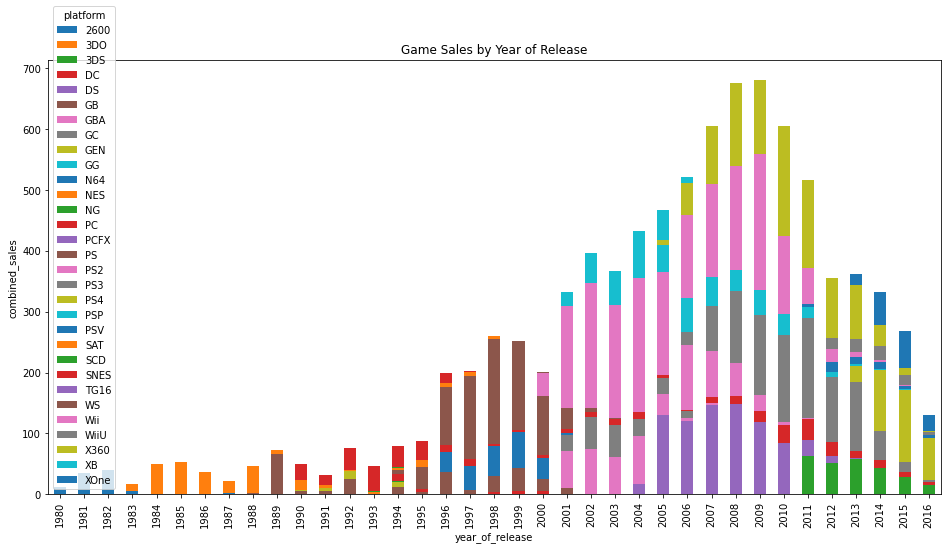

In [16]:
game_sales_pt = pd.pivot_table(game_df, index='year_of_release', columns='platform', values='comb_sales', aggfunc='sum')
game_sales_pt.plot(kind='bar', stacked=True, title='Game Sales by Year of Release', figsize=[16, 8])
plt.ylabel('combined_sales')
plt.show()

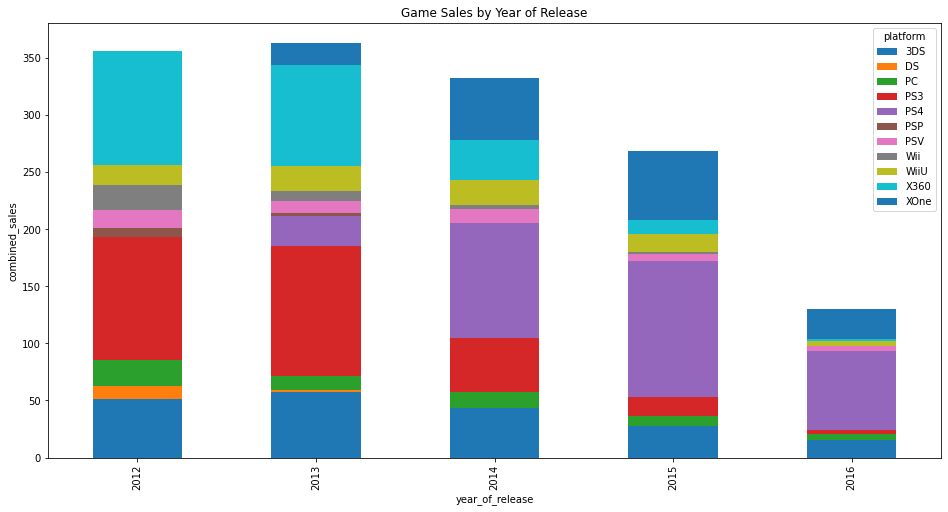

In [17]:
game_df_filtered = game_df[game_df['year_of_release'] >= 2012]
game_sales_filtered_pt = pd.pivot_table(game_df_filtered, index='year_of_release', columns='platform', values='comb_sales', aggfunc='sum')
game_sales_filtered_pt.plot(kind='bar', stacked=True, title='Game Sales by Year of Release', figsize=[16, 8])
plt.ylabel('combined_sales')
plt.show()

By around 2012, the sales of older platforms had decrease significantly and newer platforms started to dominate.
<br>Since the data for 2016 seems to be incomplete, given the abnormal decline in sales, I will focus on sales of 2015 and prior.
<br>Looking at the sales data from 2012-2015, the most profitable and growing platforms are PS4 and XOne.
<br>An ad campaign targeting the best performing platforms and the most popular genres would be needed to reverse the decline in 2016.

**Q. Build a box plot for the global sales of all games, broken down by platform.**
<br>Are the differences in sales significant?
What about average sales on various platforms? Describe your findings.

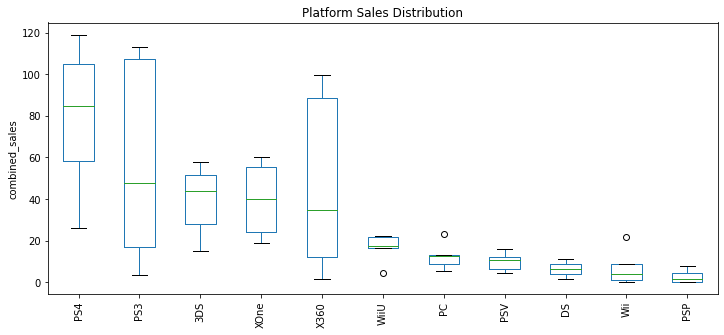

platform
X360    0.810068
PS4     0.801378
Wii     0.655000
XOne    0.645020
PS3     0.585781
Name: comb_sales, dtype: float64

In [18]:
platform_sales_pt = pd.pivot_table(game_df_filtered, index='year_of_release', columns='platform', values='comb_sales', aggfunc='sum')
platform_order = platform_sales_pt.median().sort_values(ascending=False).index
platform_sales_pt[platform_order].plot(kind='box', title='Platform Sales Distribution', figsize=[12, 5])
plt.ylabel('combined_sales')
plt.xticks(rotation=90)
plt.show()

display(game_df_filtered.groupby('platform')['comb_sales'].mean().sort_values(ascending=False)[:5])

The differences in sales are quite significant between platforms. With PS4, PS3, 3DS, XOne, and X360 having the highest median sales. 
<br>As for the average sales on each platform, the top platforms have significantly higher avg. sales compared to the other platforms.
<br>This could be due to the significant growth in the gaming industry since the early 2000s, especially in the home console market.

**Q. Take a look at how user and professional reviews affect sales for one popular platform (you choose).**
<br>Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

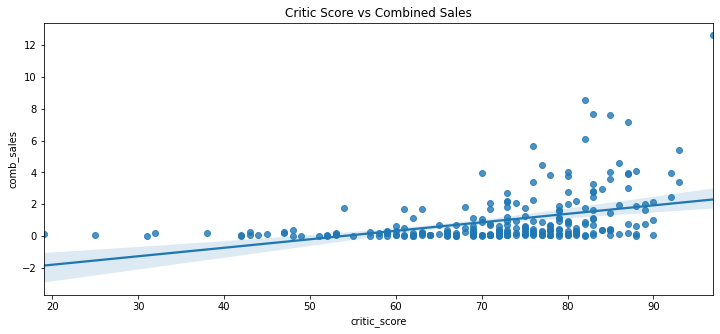

0.3082902958724705

In [19]:
ps4_games = game_df_filtered[game_df_filtered['platform']=='PS4']
fig, ax = plt.subplots(figsize=[12, 5])
sns.regplot(data=ps4_games, x='critic_score', y='comb_sales')
ax.set_title('Critic Score vs Combined Sales')
plt.show()

correlation = game_df_filtered['critic_score'].corr(game_df_filtered['comb_sales'])
display(correlation)

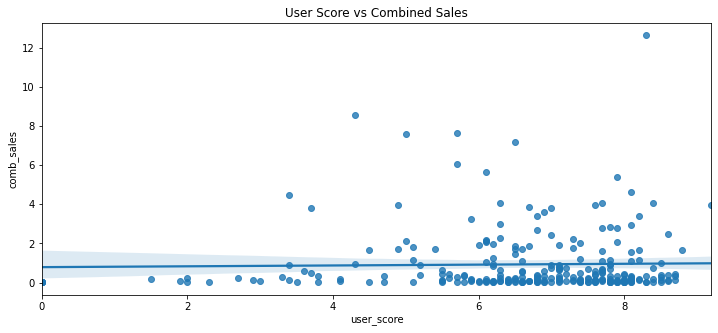

0.1652109955634836

In [20]:
fig, ax = plt.subplots(figsize=[12, 5])
sns.regplot(data=ps4_games, x='user_score', y='comb_sales')
ax.set_title('User Score vs Combined Sales')
plt.show()

correlation = game_df['user_score'].corr(game_df['comb_sales'])
display(correlation)

The platform of choice is here PS4, which is one of the recent home consoles that debutted in late 2013.
<br>There is moderate correlation between critic_score and game salses (corr=0.308).
<br>There is weak correlation between user_score and game sales (corr=0.165).
<br>I believe this means critic_score does influence users' decision to purchase games.
<br>*Here I'm not sure if I understand how to sort the x-axis on these scatter plots.

**Q. Choose the games with the greatest total sales and build a distribution based on data for each year.**

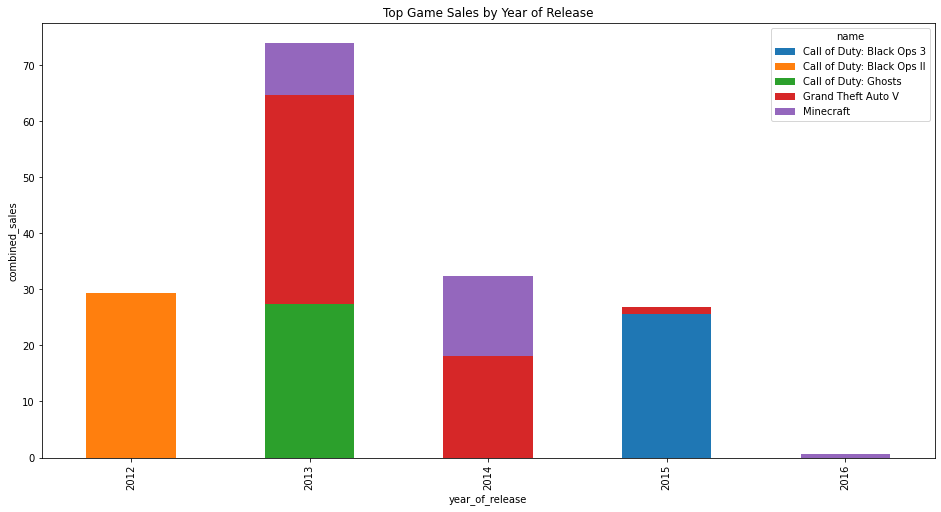

In [21]:
top_game_list = list(game_df.groupby('name')['comb_sales'].sum().sort_values(ascending=False)[:20].index)
top_game_df = game_df_filtered[game_df_filtered['name'].isin(top_game_list)]
top_game_pt = pd.pivot_table(top_game_df, index='year_of_release', columns='name', values='comb_sales', aggfunc='sum')
top_game_pt.plot(kind='bar', stacked=True, title='Top Game Sales by Year of Release', figsize=[16, 8])
plt.ylabel('combined_sales')
plt.show()

2013 saw tremendous game sales with the release of Grand Theft Auto V and Call of Duty: Ghosts.

**Q. Keeping your conclusions in mind, compare the sales of the same games on other platforms.**
<br>Take a look at the general distribution of games by genre. 
<br>What can we say about the most profitable genres? Can you generalize about genres with high and low sales?


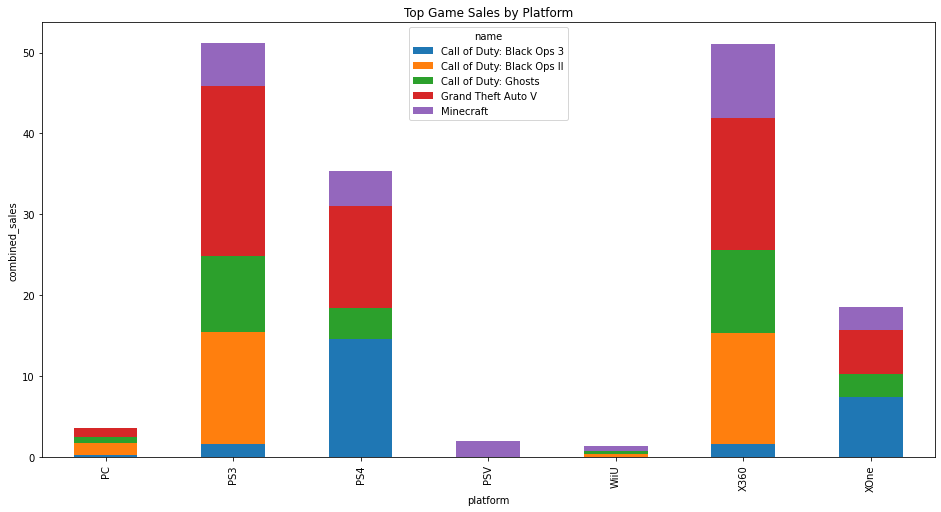

In [22]:
top_game_platform_pt = pd.pivot_table(top_game_df, index='platform', columns='name', values='comb_sales', aggfunc='sum')
top_game_platform_pt.plot(kind='bar', title='Top Game Sales by Platform', stacked=True, figsize=[16, 8])
plt.ylabel('combined_sales')
plt.show()

In [23]:
# REVIEWER CODE
game_df.query('name == "Mario Kart Wii"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,comb_sales
9318,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


In [24]:
# Select only games that were sold on several platforms.
game_df_multiplatform = game_df[game_df.groupby('name')['platform'].transform('count') >= 2].sort_values(['name'])
#display(game_df_multiplatform.head())

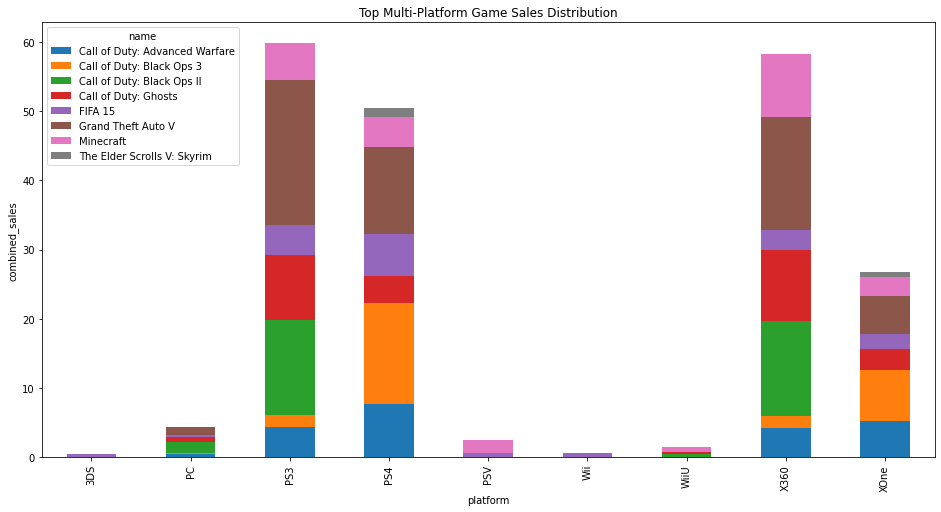

In [25]:
top_game_list_mp = list(game_df_multiplatform.groupby('name')['comb_sales'].sum().sort_values(ascending=False)[:20].index)
top_game_mp_df = game_df_filtered[game_df_filtered['name'].isin(top_game_list_mp)]
top_game_mp_pt = pd.pivot_table(top_game_mp_df, index='platform', columns='name', values='comb_sales', aggfunc='sum')
top_game_mp_pt.plot(kind='bar', title='Top Multi-Platform Game Sales Distribution', stacked=True, figsize=[16, 8])
plt.ylabel('combined_sales')
plt.show()

GTA V was not only a best seller on PS4 platform, it was also one of the best sellers on PS3, X360, and XOne.
<br>Looking at this data, it could be a good idea to run promotions on proven bestselling games when they expand to other platforms.

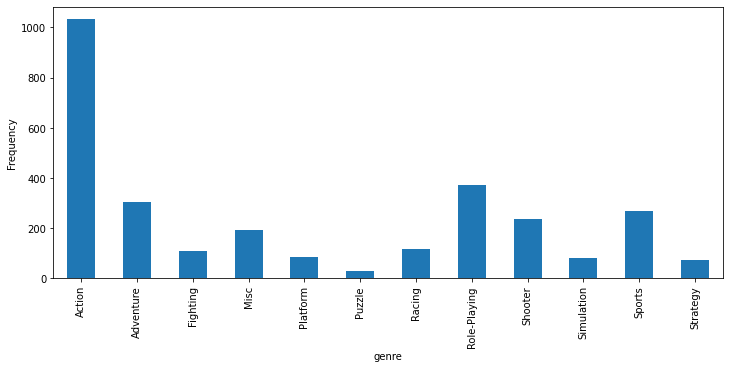

In [26]:
genre_counts = game_df_filtered.groupby('genre')['name'].count()
genre_counts.plot(kind='bar', figsize=[12, 5])
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Action genre saw significantly higher number of game releases.

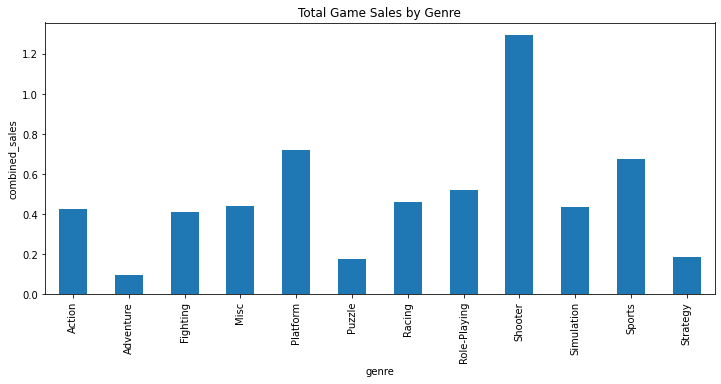

In [27]:
game_df_filtered.groupby('genre')['comb_sales'].mean().plot(kind='bar', title='Total Game Sales by Genre', figsize=[12, 5])
plt.ylabel('combined_sales')
plt.show()

Action games generated the most sales, followed by Sports, Shooter, and Role-Playing games.
<br>But when it comes to average sales per game, Shooter games generated significantly higher average sales.
<br>Just because a game is in a top genre doesn't guarantee that it will sell well, player anticipation, platform, user_sore, critic_score, market could all play a role. 

**Q. For each region (NA, EU, JP), determine: The top five platforms.**
<br>Describe variations in their market shares from region to region.

platform
X360    0.236603
PS4     0.183707
PS3     0.174652
XOne    0.157319
3DS     0.094861
Name: na_sales, dtype: float64

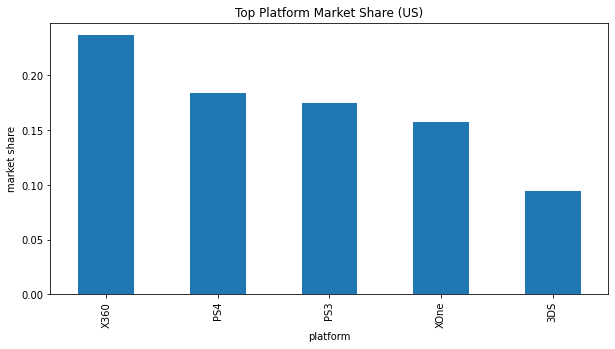

In [28]:
na_df = game_df_filtered.drop(['eu_sales', 'jp_sales'], axis=1)
na_platform_sales = na_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
na_platform_sales_ms = na_platform_sales.apply(lambda x: x/na_df['na_sales'].sum())
display(na_platform_sales_ms)

na_platform_sales_ms.plot(kind='bar', title='Top Platform Market Share (US)', figsize=[10, 5])
plt.ylabel('market share')
plt.show()

In the US market, X360(US), PS4(JP), PS3(JP) had the largest market share.
<br>The X360, which is manufactured and sold by Microsoft USA, took the largest marketshare by a large margin.

platform
PS4     0.278240
PS3     0.210736
X360    0.146959
XOne    0.101739
3DS     0.084503
Name: eu_sales, dtype: float64

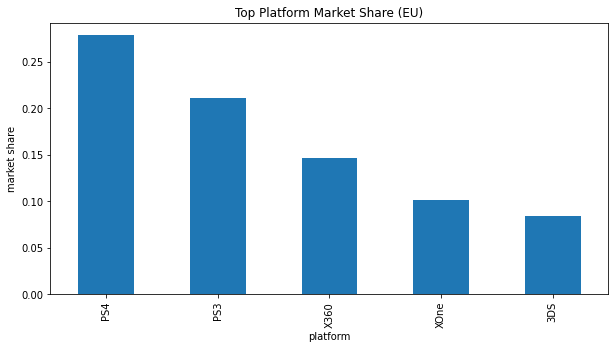

In [29]:
eu_df = game_df_filtered.drop(['na_sales', 'jp_sales'], axis=1)
eu_platform_sales = eu_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
eu_platform_sales_ms = eu_platform_sales.apply(lambda x: x/eu_df['eu_sales'].sum())
display(eu_platform_sales_ms)

eu_platform_sales_ms.plot(kind='bar', title='Top Platform Market Share (EU)', figsize=[10, 5])
plt.ylabel('market share')
plt.show()

In the EU market, PS4(JP), PS3(JP), X360(US) had the largest market share.
<br>PS4 and PS3, both of which are manufactured by Sony Japan, took the largest market share by a large margin.

platform
3DS     0.455838
PS3     0.183134
PSV     0.109549
PS4     0.082823
WiiU    0.067514
Name: jp_sales, dtype: float64

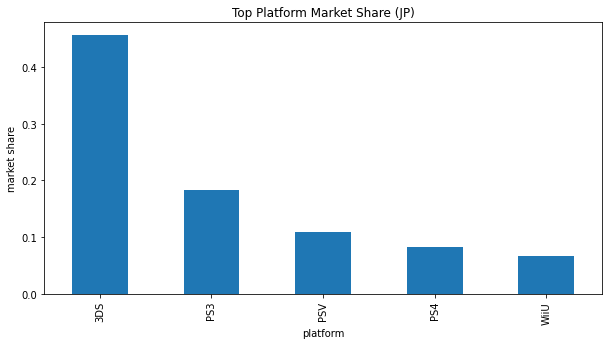

In [30]:
jp_df = game_df_filtered.drop(['na_sales', 'eu_sales'], axis=1)
jp_platform_sales = jp_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
jp_platform_sales_ms = jp_platform_sales.apply(lambda x: x/jp_df['jp_sales'].sum())
display(jp_platform_sales_ms)

jp_platform_sales_ms.plot(kind='bar', title='Top Platform Market Share (JP)', figsize=[10, 5])
plt.ylabel('market share')
plt.show()

In the JP market, 3DS(JP), PS3(JP), PSV(JP) had the largest market share.
<br>Unlike the other two markets, Nintendo 3DS, a handheld device, took the largest market share by a significant margin.
<br>This could be due to a few cultural and socio-economic reasons.
<br>1. Japan's widespread public transit is used by majority of population(~60%) everyday, which makes handheld devices a great fit.
<br>2. Japanese homes are smaller relatively, with several people sharing the TV, which makes handheld devices a great fit.
<br>3. The GDP per cap of JP is smaller than US and developed EU countries, which may hinder expensive console sales. 

genre
Action          0.300750
Shooter         0.244645
Sports          0.137738
Role-Playing    0.108309
Misc            0.064519
Name: na_sales, dtype: float64

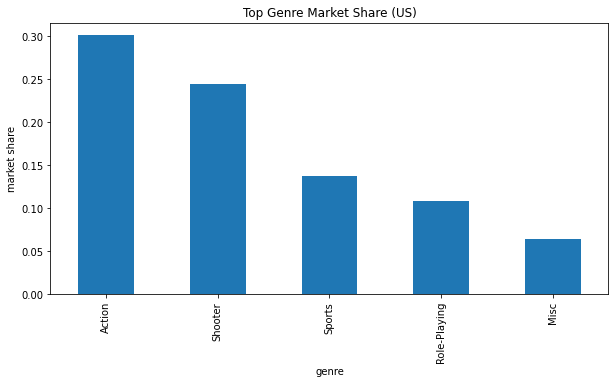

In [31]:
na_genre_sales = na_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
na_genre_sales_ms = na_genre_sales.apply(lambda x: x/na_df['na_sales'].sum())
display(na_genre_sales_ms)

na_genre_sales_ms.plot(kind='bar', title='Top Genre Market Share (US)', figsize=[10, 5])
plt.ylabel('market share')
plt.show()

In the US market, Action, Shooter, and Sports genres had the largest market share.

genre
Action          0.314605
Shooter         0.223811
Sports          0.136251
Role-Playing    0.095803
Racing          0.053818
Name: eu_sales, dtype: float64

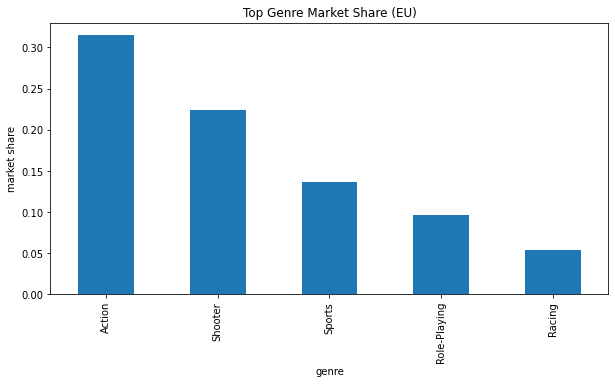

In [32]:
eu_genre_sales = eu_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
eu_genre_sales_ms = eu_genre_sales.apply(lambda x: x/eu_df['eu_sales'].sum())
display(eu_genre_sales_ms)

eu_genre_sales_ms.plot(kind='bar', title='Top Genre Market Share (EU)', figsize=[10, 5])
plt.ylabel('market share')
plt.show()

Similar to the US market, Action, Shooter, and Sports genres had the largest market share in the EU market.

genre
Role-Playing    0.340114
Action          0.274001
Misc            0.066736
Simulation      0.054022
Fighting        0.048988
Name: jp_sales, dtype: float64

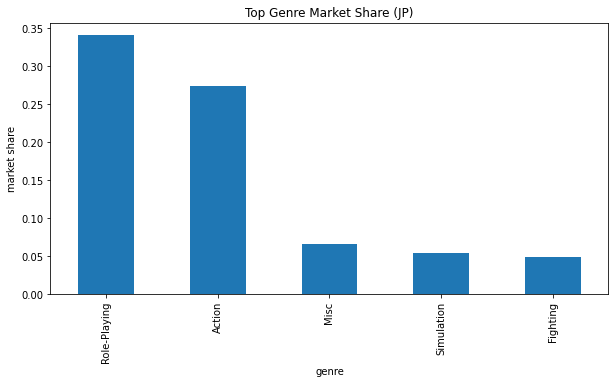

In [33]:
jp_genre_sales = jp_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]
jp_genre_sales_ms = jp_genre_sales.apply(lambda x: x/jp_df['jp_sales'].sum())
display(jp_genre_sales_ms)

jp_genre_sales_ms.plot(kind='bar', title='Top Genre Market Share (JP)', figsize=[10, 5])
plt.ylabel('market share')
plt.show()

In the JP market, Role-Playing and Action genres had the largest market share. While Shooter genre is not in the top 5 genres.
<br> This could be due to cultural difference between JP and other regions.

**Q. Do ESRB ratings affect sales in individual regions?**

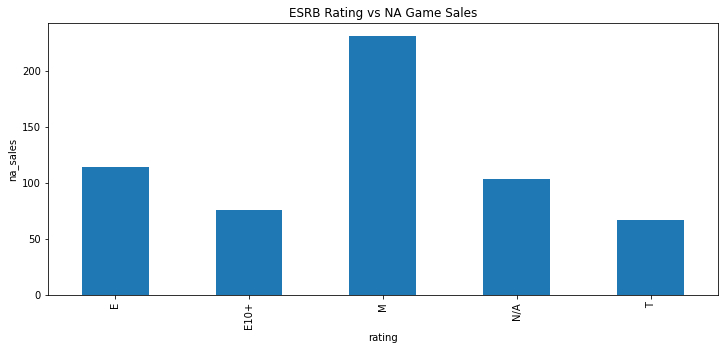

In [34]:
na_df.groupby('rating')['na_sales'].sum().plot(kind='bar', title='ESRB Rating vs NA Game Sales', figsize=[12, 5])
plt.ylabel('na_sales')
plt.show()

In [35]:
display(na_df.groupby(['name','genre','rating'])['na_sales'].sum().sort_values(ascending=False).head(10))

name                            genre    rating
Grand Theft Auto V              Action   M         23.84
Call of Duty: Ghosts            Shooter  M         14.71
Call of Duty: Black Ops II      Shooter  M         14.08
Call of Duty: Black Ops 3       Shooter  N/A       12.25
Minecraft                       Misc     N/A       11.28
Call of Duty: Advanced Warfare  Shooter  M         10.51
Halo 4                          Shooter  M          6.65
Destiny                         Shooter  T          6.62
Battlefield 4                   Shooter  M          6.44
Assassin's Creed III            Action   M          6.24
Name: na_sales, dtype: float64

In the period 2012-2016, the games with M rating had the highest sales.
<br>I believe this result is highly skewed by bestselling games like 'Grand Theft Auto V' and 'Call of Duty' series that released in this period.

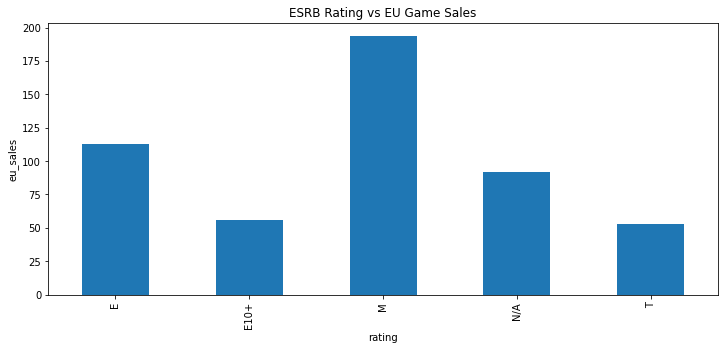

In [36]:
eu_df.groupby('rating')['eu_sales'].sum().plot(kind='bar', title='ESRB Rating vs EU Game Sales', figsize=[12, 5])
plt.ylabel('eu_sales')
#plt.xticks(rotation=90)
plt.show()

In [37]:
display(na_df.groupby(['name','genre','rating'])['na_sales'].sum().sort_values(ascending=False).head(10))

name                            genre    rating
Grand Theft Auto V              Action   M         23.84
Call of Duty: Ghosts            Shooter  M         14.71
Call of Duty: Black Ops II      Shooter  M         14.08
Call of Duty: Black Ops 3       Shooter  N/A       12.25
Minecraft                       Misc     N/A       11.28
Call of Duty: Advanced Warfare  Shooter  M         10.51
Halo 4                          Shooter  M          6.65
Destiny                         Shooter  T          6.62
Battlefield 4                   Shooter  M          6.44
Assassin's Creed III            Action   M          6.24
Name: na_sales, dtype: float64

Like in the US market, in the period 2012-2016, games with M rating had the highest sales in the EU market.
<br>Again, I believe this result is highly skewed by bestselling games like 'Grand Theft Auto V' and 'Call of Duty' series that released in this period.

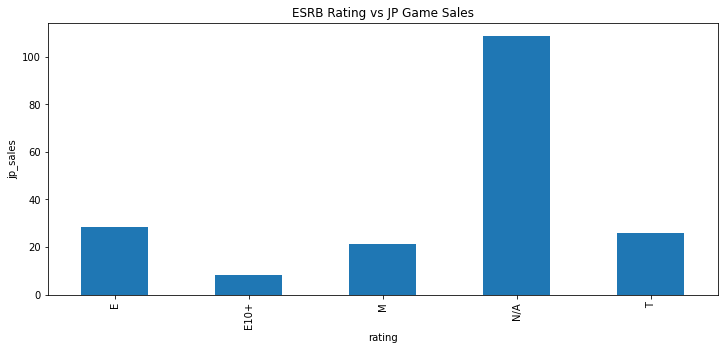

In [38]:
jp_df.groupby('rating')['jp_sales'].sum().plot(kind='bar', title='ESRB Rating vs JP Game Sales', figsize=[12, 5])
plt.ylabel('jp_sales')
#plt.xticks(rotation=90)
plt.show()

In [39]:
display(jp_df.groupby(['name','genre','rating'])['jp_sales'].sum().sort_values(ascending=False).head(10))

name                                       genre         rating
Animal Crossing: New Leaf                  Simulation    E         4.39
Pokemon X/Pokemon Y                        Role-Playing  N/A       4.35
Monster Hunter 4                           Role-Playing  N/A       3.44
Super Smash Bros. for Wii U and 3DS        Fighting      N/A       3.24
Yokai Watch 2 Ganso/Honke                  Role-Playing  N/A       3.18
Pokemon Black 2/Pokemon White 2            Role-Playing  N/A       3.14
Pokemon Omega Ruby/Pokemon Alpha Sapphire  Role-Playing  N/A       3.10
Monster Hunter X                           Action        N/A       2.79
Yokai Watch 2 Shinuchi                     Role-Playing  N/A       2.68
Monster Hunter 4 Ultimate                  Role-Playing  T         2.62
Name: jp_sales, dtype: float64

ESRB is an organization that assigns age and content ratings to video games in the United States and Canada.
<br>-Which means a lot of the games that were never releases in the US may not get an rating from ESRB.
<br>-This may explain why there are so many non-ESRB-rated games in Japan
<br>In the JP market, with majority of the games lacking a ESRB rating, it's hard to perform an analysis.
<br>But compared to the other two regions, games with M rating has much smaller sales.
<br>Specifically, action games like 'Grand Theft Auto V' and shooter games like 'Call of Duty'.

**Q. Test the following hypotheses:**
<br>Average user ratings of the Xbox One and PC platforms are the same.


I chose an alpha(significance level) 0.05 as this is the most commonly accepted significance level.
<br>Usually, the null hypothesis states there is no statistically significant difference/finding in the data compared.
<br>Hence, the null hypothesis I chose here is that average user ratings of the Xbox One and PC platforms are the same.
<br>The alternative hypothesis would be that average user ratings of the Xbox One and PC platforms differs.

In [40]:
#display(user_rating_filtered[user_rating_filtered['platform']=='XOne']['user_score'].var())
#display(user_rating_filtered[user_rating_filtered['platform']=='PC']['user_score'].var())
user_rating_filtered = game_df[game_df['user_score'] > 0]
xbox_rating = user_rating_filtered[user_rating_filtered['platform']=='XOne']['user_score']
pc_rating = user_rating_filtered[user_rating_filtered['platform']=='PC']['user_score']
alpha = 0.05

results = st.ttest_ind(xbox_rating, pc_rating, equal_var=False)
display(f'p-alue: {results.pvalue}')

if results.pvalue < 0.05:
    print("We reject the null hypothesis. Average user ratings of the Xbox One and PC platforms differ.")
else:
    print("We can't reject the null hypothesis. Average user ratings of the Xbox One and PC platforms are the same.")

'p-alue: 4.93507236018374e-06'

We reject the null hypothesis. Average user ratings of the Xbox One and PC platforms differ.


Here I assumed equal_var=False because these aren't randomly sampled groups from the same population but rather distinct groups with distinct preferences on home consoles. I think I should have checked their variances just to make sure.

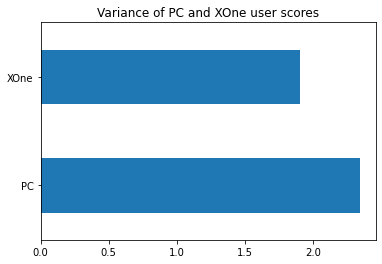

In [41]:
# REVIEWER CODE
pd.Series((
    user_rating_filtered.query('platform == "PC"')['user_score'].var(),
    user_rating_filtered.query('platform == "XOne"')['user_score'].var()),
    index=['PC','XOne']).plot(kind='barh').set(title='Variance of PC and XOne user scores');

**Q. Test the following hypotheses:**
<br>Average user ratings for the Action and Sports genres are the same.

I chose an alpha(significance level) 0.05 as this is the most commonly accepted significance level.
<br>The null hypothesis I chose here is that average user ratings for the Action and Sports genres are the same.
<br>The alternative hypothesis would be that average user ratings for the Action and Sports genres differ.

In [42]:
#display(user_rating_filtered[user_rating_filtered['genre']=='Action']['user_score'].var())
#display(user_rating_filtered[user_rating_filtered['genre']=='Sports']['user_score'].var())
action_rating = user_rating_filtered[user_rating_filtered['genre']=='Action']['user_score']
sports_rating = user_rating_filtered[user_rating_filtered['genre']=='Sports']['user_score']
alpha = 0.05

results = st.ttest_ind(action_rating, sports_rating, equal_var=False)
display(f'p-alue: {results.pvalue}')

if results.pvalue < 0.05:
    print("We reject the null hypothesis. Average user ratings for the Action and Sports genres differs.")
else:
    print("We can't reject the null hypothesis. Average user ratings for the Action and Sports genres are the same.")

'p-alue: 0.11483818791498647'

We can't reject the null hypothesis. Average user ratings for the Action and Sports genres are the same.


**General Conclusions**
<br>1. Up until 1999, less than 10% (0% for a lot of the early years) of the games had a user or critic rating. Then starting from ~2000, this % increased drastically, coinciding with the widespread adoption of the internet.
<br>2. Top platforms with the greatest sales are mostly home consoles and a large number of game platforms that used to be popular have gone extinct. With the average new platform emerging every 1.1 years and stay active for 7.0 years.
<br>3. The top platforms have significantly higher median and average game sales  compared to the other platforms. This could be due to the significant growth in the gaming industry since the early 2000s, especially in the home console market.
<br>4. For PS4 platform, there is moderate correlation between critic_score and game salses (corr=0.308) and weak correlation between user_score and game sales (corr=0.165). I believe this means critic_score does influence users' decision to purchase games.
<br>5. 2013 saw tremendous game sales with the release of Grand Theft Auto V and Call of Duty: Ghosts.
<br>6. Action games generated the most sales, followed by Sports, Shooter, and Role-Playing games. But when it comes to average sales per game, Shooter games generated significantly higher average sales.
<br>7. In US and EU markets, home consoles platform dominated the market share. But in Japan, handheld devices had higher market share than home consoles. This could be due to a few cultural and socioeconomic reasons such as world class public transit, smaller living area, and lower GDP per capita.
<br>8. In US and EU markets, Action, Shooter, and Sports genres had the largest market share. While in the Japan, Role-Playing and Action genres had the largest market share. This is likely due to gamer preferences as a result of cultural differences.
<br>9. In the period 2012-2016, the games with M rating had the highest sales, which is likely to be highly skewed by bestselling games like 'Grand Theft Auto V' and 'Call of Duty' series that released in this period. In Japan,  majority of the games lack a ESRB rating, since ESRB assigns ratings to video games in North America only, and it's hard to perform an analysis. But from the available data, it apparent that compared to the other two regions, bestselling games like 'Grand Theft Auto V' and 'Call of Duty' (both with M rating) has much smaller sales.
<br>10. Hypothesis Tests:
<br> 1) Average user ratings of the Xbox One and PC platforms differ.
<br> 2) Average user ratings for the Action and Sports genres are the same.